In [43]:
from scipy import optimize
import pylab as pl
import numpy as np
from numba import njit
from IPython.display import clear_output

In [64]:
class non_linear_pde(object):
    def __init__(self, hx, dt, y0):
        self.hx = hx
        self.dt = dt
        self.y0 = y0
    
    def derivate(self, x):
        y = np.empty_like(x)
        y[1:-1] = (x[2:] - x[:-2])/(2*self.hx)
        y[0] = (x[1] - x[-1])/(2*self.hx)
        y[-1] = (x[0] - x[-2])/(2*self.hx)
        return y
    
    def derivate2(self, x):
        y = np.empty_like(x)
        y[1:-1] = (x[2:] -2*x[1:-1] +x[:-2])/(self.hx**2)
        y[0] = (x[-1] -2*x[0] +x[1])/(self.hx**2)
        y[-1] = (x[-2] -2*x[-1] +x[0])/(self.hx**2)
        return y
    
    def rhs(self, y1):
        y_prime = self.derivate(y1)
        return y1**2*(y1*self.derivate2(y1) + y_prime*(1+y_prime))
    
    def loss(self, y1):
        return y1 - self.y0 - self.dt*self.rhs(y1)
    
    def loss_minimize(self, y1):
        return np.linalg.norm((self.y0 - self.rhs(y1)))
    
    def solve(self):
        return optimize.newton_krylov(self.loss, self.y0)
    
    def minimize(self):
        return optimize.minimize(self.loss_minimize, self.y0)
    
def start(x):
    return np.cos(x/2)

Nx = 2000
Nt = 10000
hx = 2*np.pi/Nx
dt = 0.01
x = np.linspace(-np.pi, np.pi, Nx)
y0 = start(x)
y = np.empty((Nt, Nx))

for i in range(Nt):
    if i%100 == 0:
        clear_output()
        print(i)
    y[i] = y0
    pde = non_linear_pde(hx, dt, y0)
    y0 = pde.solve()

9900


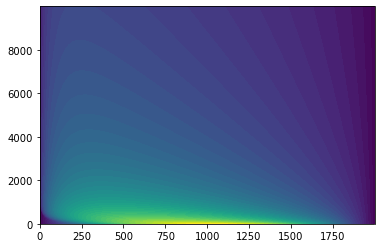

In [65]:
pl.contourf(y, 50)